# Warm up

In [1]:
import cv2

In [3]:
# Create window
# cv2.WINDOW_AUTOSIZE do not allow resizing
# cv2.WINDOW_NORMAL allows resizing
cv2.namedWindow("new", cv2.WINDOW_NORMAL) #WINDOW_NORMAL allows resizing
cv2.resizeWindow("new", 600, 600) #resize window
cv2.imshow("new", 0) #show image

key = cv2.waitKey(0) #wait for key press
# close window if q is pressed
if key & 0xFF == ord("q"):
    cv2.destroyAllWindows()

: 

# Read Image

1. Read image to form a array type 
2. Import into cv2 as a picture
3. Open a window to show picture
4. Close the window with key input

In [1]:
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np

In [8]:
img = cv2.imread("photo/img.jpg") #read image in grayscale

##### img filp

In [9]:
img_filp_0 = cv2.flip(img, 0) #flip image vertically
img_filp_1 = cv2.flip(img, 1) #flip image horizontally
img_filp_2 = cv2.flip(img, -1) #flip image vertically and horizontally

In [10]:
cv2.imwrite("photo/create/img_filp_0.jpg", img_filp_0) #save image
cv2.imwrite("photo/create/img_filp_1.jpg", img_filp_1) #save image
cv2.imwrite("photo/create/img_filp_2.jpg", img_filp_2) #save image

True

##### img transpose

In [ ]:
cv2.transpose() #transpose image

In [5]:
img.shape #get image shape

(1574, 1184)

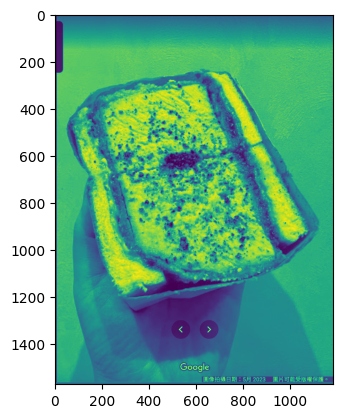

In [8]:
plt.imshow(img) #show image

In [29]:
cv2.imwrite("photo/create/img_gray.jpg", img) #save image

True

: 

In [4]:
cv2.namedWindow('kasu', cv2.WINDOW_AUTOSIZE)
cv2.startWindowThread()
cv2.imshow('kasu', img) #show image

# close window if q is pressed
key = cv2.waitKey(0)
if key in [27, ord('q'), ord('Q')]:
    cv2.destroyAllWindows()
cv2.waitKey(1) #this is necessary to close window ************

-1

## pack the function

In [7]:
def cv_show(name: str, img: np.ndarray) -> None:
    '''
    This function shows image in a window

    Parameters
    ----------
    name : str
        name of the window
    img : numpy.ndarray
        image to be shown
    
    Returns
    -------
    None

    '''

    cv2.namedWindow('kasu', cv2.WINDOW_AUTOSIZE)
    cv2.startWindowThread()
    cv2.imshow('kasu', img) #show image

    # close window if q is pressed
    key = cv2.waitKey(0)
    if key in [27, ord('q'), ord('Q')]:
        cv2.destroyAllWindows()
    cv2.waitKey(1) #this is necessary to close window ************


In [8]:
cv_show("new", img)

In [16]:
%run utils/img_input.py

In [20]:
img_array = ImgInput().get_img("photo/img.jpg")

In [25]:
ImgInput().cv_show("new", img_array)

# photo rotation

1. photo detection for different angle instead of wrong lying.

In [26]:
img_array = ImgInput().get_img("photo/img.jpg")

In [27]:
img_array_90 = np.rot90(img_array)

In [28]:
ImgInput().cv_show("new", img_array_90)

# Video Capture

##### Video is continuous photo
##### frame rate is frame per second

## Live Camera read

In [1]:
import cv2
import numpy as np

In [3]:
cv2.namedWindow('camera', cv2.WINDOW_AUTOSIZE)
cv2.resizeWindow('camera', 800, 600)
cap = cv2.VideoCapture(0) #open camera if parameter is 0

# 由於是以影像的方式讀入，所以使用迴圈讓他不斷的顯示相片
while cap.isOpened():
    ret, frame = cap.read() #read image (ret: bool, frame: np.ndarray)
    if ret == False:
        break
    cv2.imshow('camera', frame) #show image
    if cv2.waitKey(1) & 0xFF == ord('q'): #close window if q is pressed
        break

cap.release() #release camera
cv2.destroyAllWindows() #close window
cv2.waitKey(1) #this is necessary to close window ************


KeyboardInterrupt: 

: 

# MP4 Read

##### Every time need to check the file exist or not using os.path

In [9]:
cv2.namedWindow('camera', cv2.WINDOW_AUTOSIZE)
cap = cv2.VideoCapture('./video/1.mp4') # open video if parameter is video path 
# 由於是以影像的方式讀入，所以使用迴圈讓他不斷的顯示相片
while cap.isOpened():
    ret, frame = cap.read() #read image (ret: bool, frame: np.ndarray)
    if ret == False:
        break
    cv2.imshow('camera', frame) #show image
    # frame rate = 30 fps, 1 sec = 1000 ms, 1000/30 = 33.3 ms, waitKey(33)
    key = cv2.waitKey(100) # wait 1 sec for next frame
    if key & 0xFF == ord('q'): #close window if q is pressed
        break

cap.release() #release camera
cv2.destroyAllWindows() #close window
cv2.waitKey(1) #this is necessary to close window ************

-1

# 影片錄製

In [8]:
cap = cv2.VideoCapture(0)
# 設定擷取影像的尺寸大小
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
vw = cv2.VideoWriter('./video/create/output.avi', fourcc, 30, (640, 480))

while cap.isOpened():
    ret, frame = cap.read()
    if ret == False:
        break
    vw.write(frame)
    cv2.imshow('camera', frame)
    
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
vw.release()
cv2.destroyAllWindows()
cv2.waitKey(1) #this is necessary to close window ************
